In [3]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils
import os
from models.full_model import crease
#import seaborn as sns
#sns.set(color_codes=True)

data_dir = '/home/sander/Inv3D_pre/inv3d/data/'

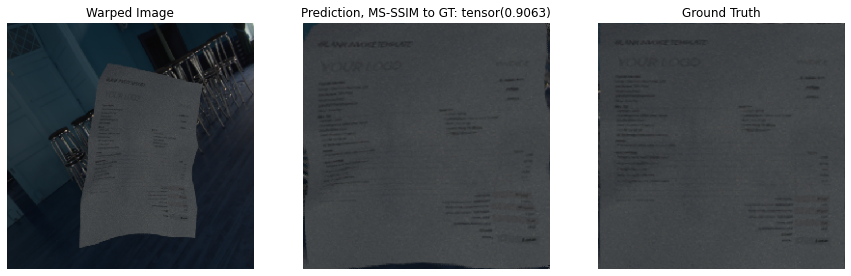

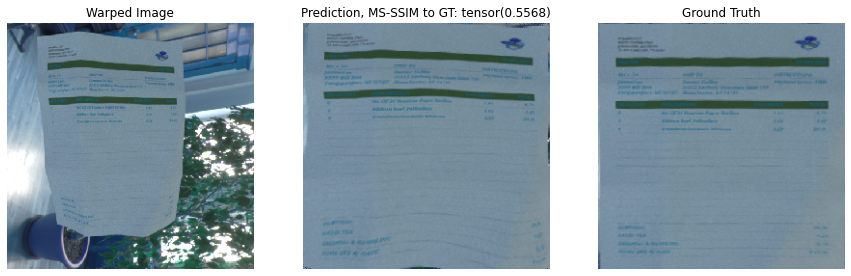

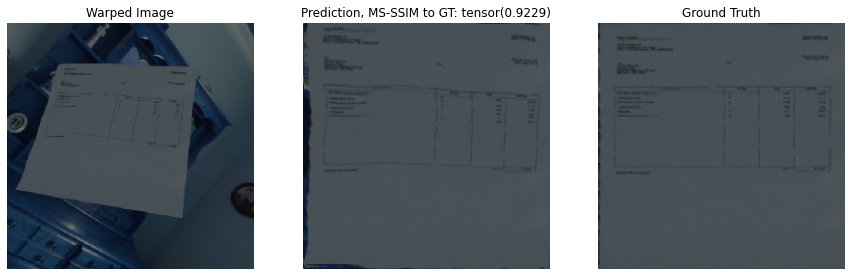

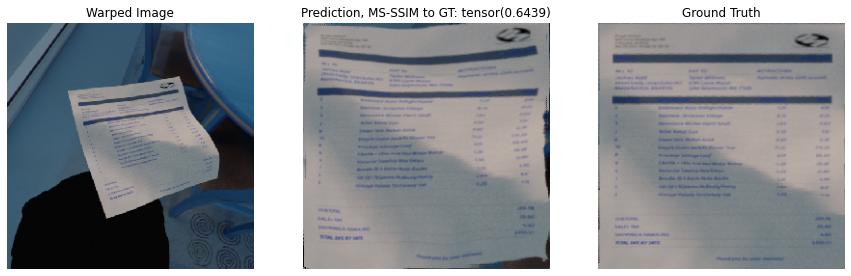

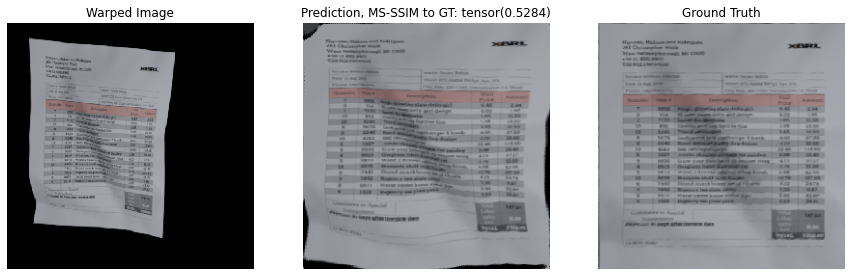

In [4]:
model_full = crease()
model_full.load_state_dict(torch.load('models/pretrained/crease_monster_best.pkl'))
model_full.eval()

ordner = sorted(os.listdir(data_dir+'test/'))

for item in ordner[:5]:
    utils.plt_crease(data_dir + 'test/' + item, model_full, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
ic| label: 'warped_bm', labels[label].shape: torch.Size([2, 448, 448])
ic| label: 'warped_angle'
    labels[label].shape: torch.Size([2, 256, 256])


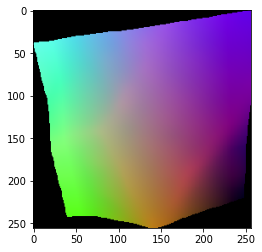

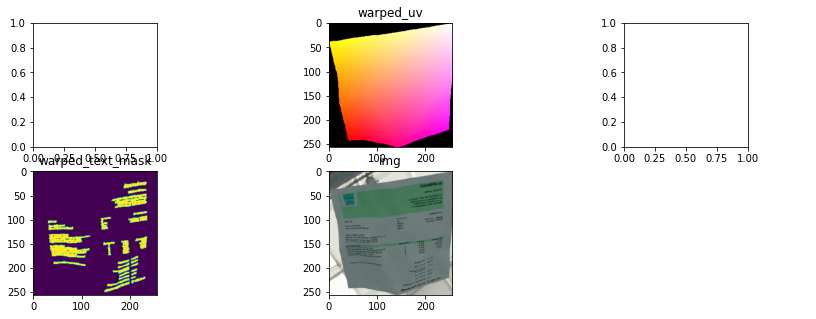

In [ ]:
from icecream import ic
wc, labels = utils.crop_all(data_dir + 'train/0000')
plt.imshow(wc.transpose(0,1).transpose(1,2))
fig, axs = plt.subplots(2,3, figsize=(15,5))
counter = -1
axs = axs.ravel()

for label in labels:
    counter += 1
    try:
        axs[counter].imshow(labels[label].transpose(0,1).transpose(1,2))
        axs[counter].set_title(label)
        #plt.imshow(labels[label].transpose(0,1).transpose(1,2))
    except TypeError:
        #pass
        ic(label,labels[label].shape)

    plt.axis('off')

## Checking Data Ranges

In [7]:
from icecream import ic
data_dir = '/home/sander/Inv3D_pre/inv3d/data/'
path = data_dir+'test/'
ordner = sorted(os.listdir(path))

bm_list = []
for item in ordner[:5]:
    #utils.compare_ssim_all(data_dir + item, bm_model)
    wc, labels = utils.crop_all(path + item)
    
    print('wc', wc.min(), wc.max())
    for label in labels:
        print(label, labels[label].min(), labels[label].max())


wc tensor(0.) tensor(0.9574)
warped_bm tensor(-1.) tensor(1.0000)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.4272) tensor(0.5829)
warped_text_mask tensor(0.) tensor(1.)
img tensor(0.0275) tensor(0.6275)
wc tensor(0.) tensor(0.9492)
warped_bm tensor(-1.) tensor(1.)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.7328) tensor(0.5205)
warped_text_mask tensor(0.) tensor(1.)
img tensor(0.0235) tensor(1.)
wc tensor(0.) tensor(0.9127)
warped_bm tensor(-1.) tensor(1.)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.0908) tensor(0.5816)
warped_text_mask tensor(0.) tensor(1.)
img tensor(0.0235) tensor(0.4588)
wc tensor(0.) tensor(0.9296)
warped_bm tensor(-1.) tensor(1.)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.7284) tensor(0.1819)
warped_text_mask tensor(0.) tensor(1.)
img tensor(0.) tensor(0.7373)
wc tensor(0.) tensor(0.9661)
warped_bm tensor(-1.) tensor(1.)
warped_uv tensor(0.) tensor(1.)
warped_angle tensor(-0.3640) tensor(0.9342)
warped_text_mask tenso